# Case Study: Churn prediction project

**Data Science Use Case in Marketing**: Customer Churn Rate Prediction
Customer churn is a tendency of customers to cancel their subscriptions to a service they have been using and, hence, stop being a client of that service. Customer churn rate is the percentage of churned customers within a predefined time interval. It's the opposite of the customer growth rate that tracks new clients.

Customer churn rate is a very important indicator of customer satisfaction and the overall business wellness of the company. Apart from natural churn which always takes place in any business, or seasonable churn typical of some services, there are other factors that can mean something in the company has gone wrong and should be fixed. These factors are:

* lack or low quality of customer support<br>,
*  negative customer experiences<br>,
* switching to a competitor with better conditions or pricing strategy<br>,
* customers’ priorities changed<br>,
* long-time customers don’t feel satisfied<br>,
* the service didn't meet customers’ expectations<br>,
* finance issues<br>,
* fraud protection on customers' payments<br>.

High customer churn rate represents a serious problem for any company for the following reasons:

* It correlates with the company's revenue loss<br>.
* It takes much more money to acquire new customers than to retain the existing ones. This is especially true for highly ** competitive markets<br>.
* In the case of churning because of poor customer service, the company's reputation may be heavily damaged because of negative reviews left by unsatisfied ex-customers on social media or review websites<br>.
Customer retention is a crucial component of the business strategy for all subscription-based services. To predict customer churn rate and undertake the corresponding preventive measures, it's necessary to gather and analyze the information on customer behavior (purchase intervals, the overall period of being a client, cancellations, follow-up calls and messages, online activity) and figure out which attributes and their combinations are characteristic to the clients that are at risk of leaving. Knowing in advance which customers may churn soon, especially in the case of high revenue or long-time customers, can help the company to focus exactly on them and develop an efficient strategy to try to convince them to stay. The approach can include a call to such clients with a special offer of a gift, discount, subscription upgrading for the same price, or any other customized experience.

Technically, customer churn prediction is a typical classification problem of machine learning when the clients are labeled as "yes" or "no", in terms of being at risk of churning, or not. Let's investigate this use case in Python on real-world data.

We'll use Decision Tree to predict churn


## 1.1 

* Dataset: https://drive.google.com/file/d/15C1130YVEymfJltHUFX9nZr-OGns82gJ/view?usp=drive_link



### Dataset  information

customerID
Customer ID

gender
Whether the customer is a male or a female

SeniorCitizen
Whether the customer is a senior citizen or not (1, 0)

Partner
Whether the customer has a partner or not (Yes, No)

Dependents
Whether the customer has dependents or not (Yes, No)

tenure
Number of months the customer has stayed with the company

PhoneService
Whether the customer has a phone service or not (Yes, No)

MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService
Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity
Whether the customer has online security or not (Yes, No, No internet service)

## 1.2 Data Science Workflow

#### Data preprocessing
**Download the data, read it with pandas<br>**
**Look at the data<br>**
**Make column names and values look uniform<br>**
**Check if all the columns read correctly<br>**
**Check if the churn variable needs any preparation<br>**

#### EDA

**check for missing values/ treat them with right imputation techniques<br>**
**Look at the target variable (churn)<br>**
**Look at numerical and categorical variables<br>**
**Visualize the data -- understand the relationship/impacts<br>**
**Feature selection -- requires domain understanding along with techincal knowledge<br>**
**Feature Engineering --> encoding the data/creating the new features<br>**
**conduct a hypothesis testing if required**<br>

#### Build The model
**Setting up the framework<br>**
**Model building<br>**
**Feature selection<br>**
**Model evaluation<br>**
**model optimization<br>**
**Model interepretation<br>**
**Choosing the right model<br>**


#### Deployment 
**Understand Mlops -- Machine learning operation-optional**


#### Data preprocessing
* Download the data, read it with pandas<br>
* Look at the data<br>
* Make column names and values look uniform<br>
* Check if all the columns read correctly<br>
* Check if the churn variable needs any preparation<br>

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#read data
df = pd.read_csv(r"C:\Users\Soniya taj\OneDrive\Desktop\Telco.csv");

In [8]:
#sanity check
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
len(df.columns)

21

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [12]:
#prepare data



df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [13]:
#recheck
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [14]:
#convert churn variable to int

df.churn = (df.churn == 'yes').astype(int)

In [15]:
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

#### EDA

* check for missing values/ treat them with right imputation techniques<br>
* Look at the target variable (churn)<br>
* Look at numerical and categorical variables<br>
* Visualize the data -- understand the relationship/impacts<br>
* Feature selection -- requires domain understanding along with techincal knowledge<br>
* Feature Engineering --> encoding the data/creating the new features<br>
* conduct a hypothesis testing if required<br>

In [16]:
#check for missing data
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [17]:
#check if class if balanced or not

df.describe()


,seniorcitizen,tenure,monthlycharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [18]:
#check for the mean churn value
df.churn.mean()

0.2653698707936959

In [19]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int32
dtype: object

In [20]:
#check for numerical columns
df.select_dtypes(include = 'object')


,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges
0,7590-vhveg,female,yes,no,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85
1,5575-gnvde,male,no,no,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,1889.5
2,3668-qpybk,male,no,no,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,108.15
3,7795-cfocw,male,no,no,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),1840.75
4,9237-hqitu,female,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check,1990.5
7039,2234-xaduh,female,yes,yes,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic),7362.9
7040,4801-jzazl,female,yes,yes,no,no_phone_service,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic_check,346.45
7041,8361-ltmkd,male,yes,no,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,mailed_check,306.6


In [21]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int32
dtype: object

In [22]:
#check for categorical columns

df.select_dtypes(include ='number')


,seniorcitizen,tenure,monthlycharges,churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


In [23]:
#convert total charges to number
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')

In [24]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [25]:
pip install autoviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [27]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()
#report = AV.AutoViz(filename="",dfte=df,verbose=2,depVar="",header=0,lowess=False,chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

In [28]:
df.isna().sum() 

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [29]:
df.totalcharges.mean()

2283.3004408418656

In [30]:
df.totalcharges = df.totalcharges.replace(to_replace=np.NaN, value=df.totalcharges.mean())

In [31]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

<Axes: xlabel='churn', ylabel='count'>

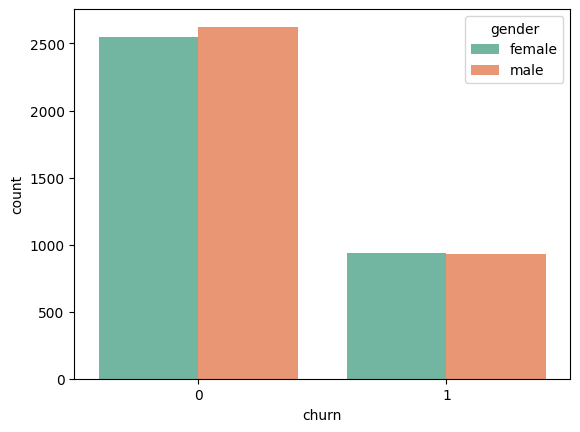

In [32]:
import seaborn as sns
sns.countplot(data = df,x='churn',hue='gender',palette='Set2')


<Axes: xlabel='monthlycharges', ylabel='totalcharges'>

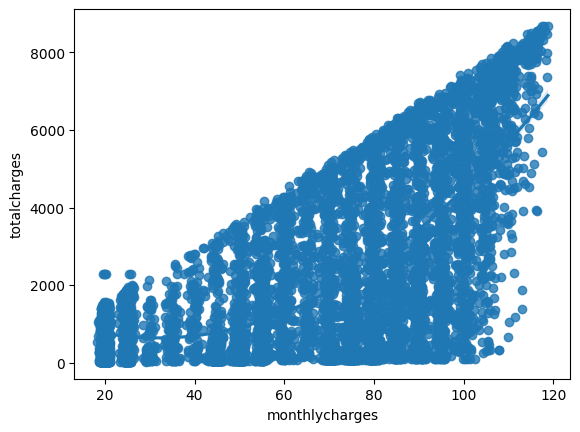

In [33]:
#bivariate analysis
sns.regplot(data=df, x="monthlycharges", y="totalcharges", order=2)

In [34]:
df.corr()

C:\Users\Soniya taj\AppData\Local\Temp\ipykernel_27832\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,seniorcitizen,tenure,monthlycharges,totalcharges,churn
seniorcitizen,1.000000,0.016567,0.220173,0.102395,0.150889
tenure,0.016567,1.000000,0.247900,0.824757,-0.352229
monthlycharges,0.220173,0.247900,1.000000,0.650468,0.193356
totalcharges,0.102395,0.824757,0.650468,1.000000,-0.199428
churn,0.150889,-0.352229,0.193356,-0.199428,1.000000


C:\Users\Soniya taj\AppData\Local\Temp\ipykernel_27832\2474408217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

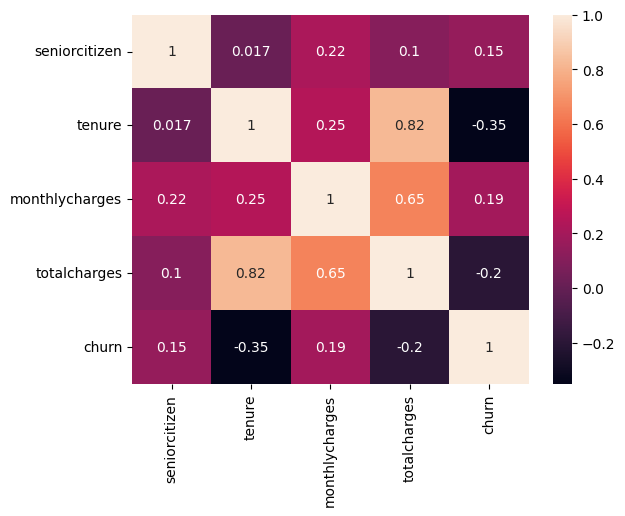

In [35]:
#multivariate
sns.heatmap(df.corr(),annot=True)

In [36]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [37]:
from sklearn.feature_selection import SelectKBest, chi2

In [38]:
x= df[['seniorcitizen','tenure','monthlycharges','totalcharges']]

In [39]:
y=df[['churn']]

In [40]:
x1 = SelectKBest(chi2, k=4).fit_transform(x, y)

In [41]:
x1

array([[0.0000e+00, 1.0000e+00, 2.9850e+01, 2.9850e+01],
       [0.0000e+00, 3.4000e+01, 5.6950e+01, 1.8895e+03],
       [0.0000e+00, 2.0000e+00, 5.3850e+01, 1.0815e+02],
       ...,
       [0.0000e+00, 1.1000e+01, 2.9600e+01, 3.4645e+02],
       [1.0000e+00, 4.0000e+00, 7.4400e+01, 3.0660e+02],
       [0.0000e+00, 6.6000e+01, 1.0565e+02, 6.8445e+03]])

In [42]:
test= SelectKBest(score_func=chi2,k=3)
fit = test.fit(x,y)

In [43]:
np.set_printoptions(precision = 3)
print(fit.scores_)

[1.344e+02 1.628e+04 3.681e+03 6.293e+05]


In [44]:
#from sklearn.feature_selection import RFE

In [45]:
#selectkbest and correlation is used befor model building and RFE is after model biulding(selects only imp features)

In [46]:
#outlier treatment --->home work
#Iqr(numerical)

<Axes: >

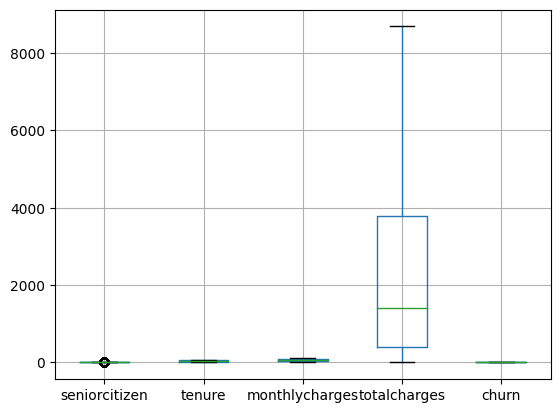

In [47]:
df.boxplot()

<Axes: >

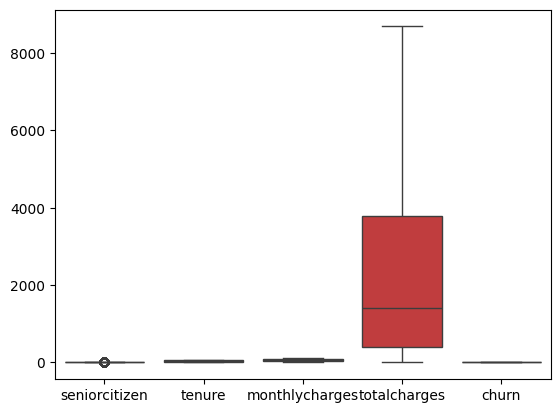

In [48]:
sns.boxplot(df)

<Axes: ylabel='seniorcitizen'>

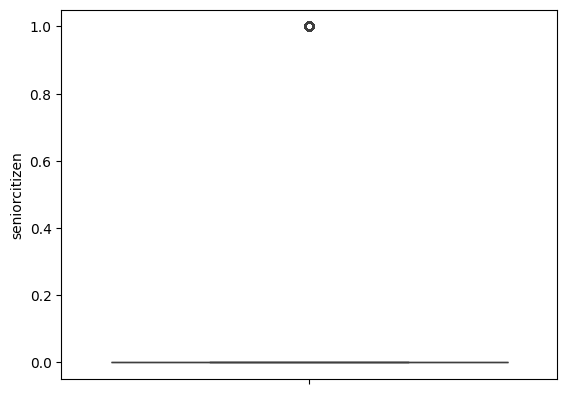

In [49]:
sns.boxplot(df.seniorcitizen)

<Axes: ylabel='tenure'>

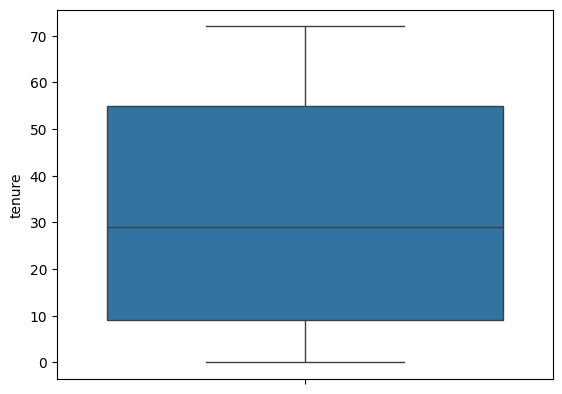

In [50]:
sns.boxplot(df.tenure)

<Axes: ylabel='monthlycharges'>

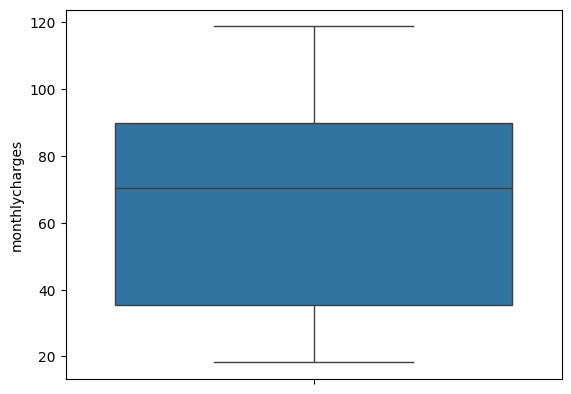

In [51]:
sns.boxplot(df.monthlycharges)

<Axes: ylabel='totalcharges'>

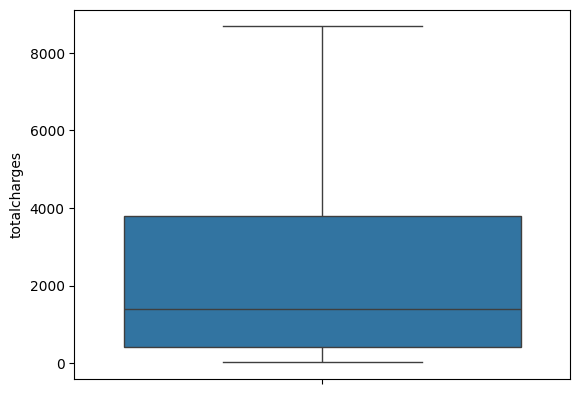

In [52]:
sns.boxplot(df.totalcharges)

In [53]:
df.onlinesecurity.value_counts()

no                     3498
yes                    2019
no_internet_service    1526
Name: onlinesecurity, dtype: int64

In [54]:
#features having two values we have to apply labelencoder

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
enc = LabelEncoder()

In [57]:
df.gender = enc.fit_transform(df.gender)

In [58]:
df.gender.value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [59]:
df.dependents = enc.fit_transform(df.dependents)

In [60]:
df.partner = enc.fit_transform(df.partner)

In [61]:
df.phoneservice = enc.fit_transform(df.phoneservice)

In [62]:
df.phoneservice.value_counts()

1    6361
0     682
Name: phoneservice, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder


In [64]:
enc = LabelEncoder()

In [65]:
cat_col = df.select_dtypes(include = 'object').columns

In [66]:
for col in cat_col:
    df[col] = enc.fit_transform(df[col])

In [67]:
df.dtypes

customerid            int32
gender                int32
seniorcitizen         int64
partner               int32
dependents            int32
tenure                int64
phoneservice          int32
multiplelines         int32
internetservice       int32
onlinesecurity        int32
onlinebackup          int32
deviceprotection      int32
techsupport           int32
streamingtv           int32
streamingmovies       int32
contract              int32
paperlessbilling      int32
paymentmethod         int32
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [68]:
df.drop('customerid',axis=1,inplace=True)

In [69]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [70]:
#hypothesis testing
from scipy.stats import ttest_ind
churned_customers = df[df['churn'] == 1]['monthlycharges']
non_churned_customers = df[df['churn'] == 0]['monthlycharges']
t_stat,p_value = ttest_ind(churned_customers,non_churned_customers)
alpha = 0.05
print('T statistic:',t_stat)
print('P Value:',p_value)     

T statistic: 16.536738015936308
P Value: 2.7066456068884154e-60


In [71]:
if(p_value<alpha):
    print("Reject the null hypothesis");
else:
    print("Fail to reject the null hypothesis");

Reject the null hypothesis


In [72]:
#setting up the framework

X = df.iloc[:,:-1]

In [73]:
X


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [74]:
y = df.iloc[:,-1]

In [75]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state = 100)

In [78]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [79]:
df.shape

(7043, 20)

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
d_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [82]:
d_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [83]:
pred_tree = d_model.predict(X_test)

In [84]:
pred_tree

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [86]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1025
           1       0.57      0.55      0.56       384

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.76      0.76      1409



In [87]:
precision_score(y_test,pred_tree)

0.5672043010752689

In [88]:
accuracy_score(y_test,pred_tree)

0.7629524485450674

In [89]:
recall_score(y_test,pred_tree)

0.5494791666666666

In [90]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion' :["gini","entropy"]
}

In [91]:
grid_search = GridSearchCV(estimator=d_model,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [92]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [93]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [94]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [95]:
from imblearn.over_sampling import SMOTE

In [96]:
sm = SMOTE(random_state=42)

In [98]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [99]:
d_model.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [104]:
pred_tree = d_model.predict(X_test)

In [105]:
pred_tree

array([0, 0, 0, ..., 1, 0, 0])

In [106]:
precision_score(y_test,pred_tree)

0.527306967984934

In [109]:
from sklearn.feature_selection import RFE

In [113]:
selector = RFE(d_model, n_features_to_select=10, step=1)
fit = selector.fit(X_train,y_train)
print("Num features: %s" %(fit.n_features_))
print("Selected features: %s" %(fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))

Num features: 10
Selected features: [False False False False  True  True False  True False  True False  True
 False  True  True  True False  True  True]
Feature Ranking: [10  3  9  2  1  1  7  1  6  1  8  1  5  1  1  1  4  1  1]


In [117]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
r_model = RandomForestClassifier()

In [120]:
r_model.fit(X_train,y_train)

RandomForestClassifier()

In [121]:
pred_r = r_model.predict(X_test)

In [122]:
precision_score(y_test,pred_r)

0.6148867313915858

In [123]:
accuracy_score(y_test,pred_r)

0.7778566359119943

In [124]:
r_model.feature_importances_

array([0.027, 0.021, 0.023, 0.02 , 0.16 , 0.005, 0.022, 0.029, 0.04 ,
       0.029, 0.023, 0.044, 0.017, 0.017, 0.088, 0.027, 0.051, 0.179,
       0.18 ])